# Student Information
Name: 劉啓賢

Student ID: 110164519

GitHub ID: tsuchidaken

Kaggle name: Liou Ci-Sian

Kaggle private scoreboard snapshot: 0.49029 (31名)

[Snapshot](img/pic0.png)
![pic_kaggle](https://drive.google.com/uc?export=view&id=1-zn-1emdm-2YdebPWdooQiFN1ynf5N_y)

---

# Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the DM2023-Lab2-master. You may need to copy some cells from the Lab notebook to this notebook.


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/t/09b1d0f3f8584d06848252277cb535f2) regarding Emotion Recognition on Twitter by this link https://www.kaggle.com/t/09b1d0f3f8584d06848252277cb535f2. The scoring will be given according to your place in the Private Leaderboard ranking:
    - **Bottom 40%**: Get 20% of the 30% available for this section.

    - **Top 41% - 100%**: Get (60-x)/6 + 20 points, where x is your ranking in the leaderboard (ie. If you rank 3rd your score will be (60-3)/6 + 20 = 29.5% out of 30%)   
    Submit your last submission __BEFORE the deadline (Dec. 27th 11:59 pm, Wednesday)_. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained.


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


Upload your files to your repository then submit the link to it on the corresponding e-learn assignment.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Dec. 31th 11:59 pm, Sunday)__.

# Begin Assignment Here

**Dataset:** [SemEval 2017 Task](https://competitions.codalab.org/competitions/16380)

**Task:** Classify text data into 4 different emotions using word embedding and other deep information retrieval approaches.

<!--![pic0](pics/pic0.png)-->
![pic0](https://drive.google.com/uc?export=view&id=1xrMKv0kRdx_QnKH-j4sw_bVNLntlhsr_)

Before beggining the lab, please make sure to download the [Google News Dataset](https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit) and place it in a folder named "GoogleNews" in the same directory as this file.

## 0. Load module

In [2]:
import pandas as pd
import numpy as np

import nltk
nltk.download('punkt')

%matplotlib inline
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Tsuchidaken\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## 1. Data Preparation
### 1.1 Load data

We start by loading the csv files into a single pandas dataframe for training and one for testing.

In [12]:
# 下載 Google News 模型
# !wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=FILEID' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=0B7XkCwpI5KDYNlNUTTlSS21pQmM" -O "GoogleNews-vectors-negative300.bin.gz" && rm -rf /tmp/cookies.txt
# 設定path
# py檔位置:Homework資料夾; dataset在data資料夾
path = "../"

### training data
anger_train = pd.read_csv(path + "data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv(path + "data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv(path + "data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv(path + "data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

### testing data
anger_test = pd.read_csv(path +"data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv(path +"data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv(path +"data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv(path +"data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# 結合資料集  4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
display(train_df.head())

# 亂數 shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)
print("Shape of Training df: ", train_df.shape)
print("Shape of Testing df: ", test_df.shape)

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


Shape of Training df:  (3613, 4)
Shape of Testing df:  (347, 4)


---
### ** >>> Exercise 1 (Take home): **  
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)


(3613, 30)
['all' 'and' 'are' 'at' 'be' 'but' 'can' 'for' 'have' 'if' 'in' 'is' 'it'
 'just' 'like' 'me' 'my' 'not' 'of' 'on' 'so' 'that' 'the' 'this' 'to'
 'was' 'when' 'with' 'you' 'your']


array([ 243,  955,  231,  269,  383,  293,  257,  446,  312,  216,  626,
        787,  717,  301,  243,  380,  535,  303,  793,  390,  328,  537,
       1736,  350, 1289,  228,  226,  288,  796,  229], dtype=int64)

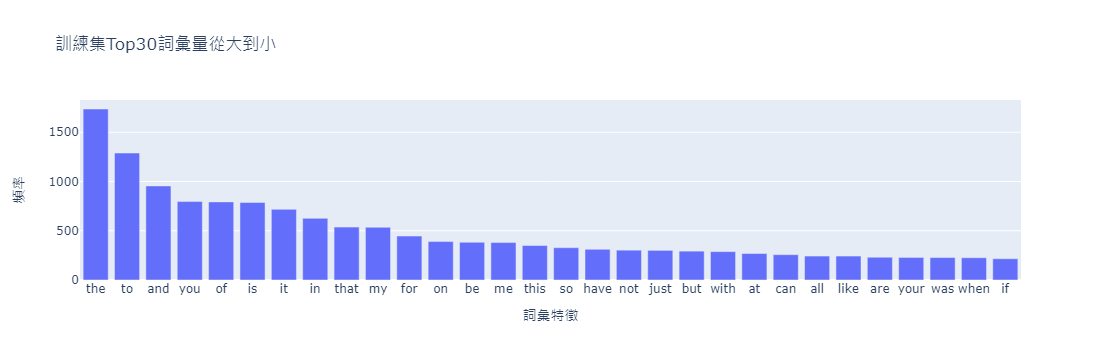

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

# 訓練集
# 首先我們利用CountVectorizer的參數max_features 來設定我們找出最頻繁出現的30個詞彙
coun_vect_train = CountVectorizer(max_features=30)
# 帶入文章成立矩陣
count_matrix_train = coun_vect_train.fit_transform(train_df.text)
print(count_matrix_train.shape)
# 列印取出的特徵
print(coun_vect_train.get_feature_names_out())

# display詞彙頻率矩陣(train_term_frequencies)
train_term_frequencies = []
for j in range(0,count_matrix_train.shape[1]):
    train_term_frequencies.append(sum(count_matrix_train[:,j].toarray()))
    
train_term_frequencies = np.asarray(count_matrix_train.sum(axis=0))[0]
display(train_term_frequencies)

#Plot trainung set
import plotly.graph_objects as go
fig = go.Figure(go.Bar(x=coun_vect_train.get_feature_names_out(), 
                y=train_term_frequencies),
                layout=layout)
layout = go.Layout(title="訓練集Top30詞彙量從大到小",xaxis={"title":"詞彙特徵"},
    yaxis={"title":"頻率"},barmode="group")
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

(347, 30)
['all' 'and' 'are' 'at' 'be' 'but' 'can' 'for' 'get' 'have' 'in' 'is' 'it'
 'just' 'like' 'me' 'my' 'not' 'of' 'on' 'so' 'that' 'the' 'this' 'to'
 'up' 'was' 'with' 'you' 'your']


array([ 30,  92,  29,  30,  40,  26,  32,  57,  26,  30,  69,  77,  83,
        29,  24,  36,  52,  24,  83,  46,  34,  55, 153,  24, 138,  24,
        34,  29,  82,  24], dtype=int64)

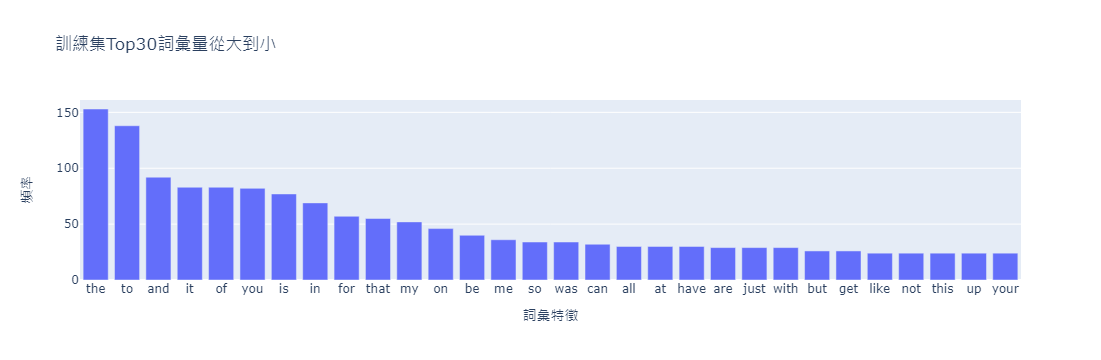

In [15]:
# 測試集
#利用CountVectorizer的參數max_features 來設定我們找出最頻繁出現的30個詞彙
coun_vect_test = CountVectorizer(max_features=30)
# 帶入文章成立矩陣
count_matrix_test = coun_vect_test.fit_transform(test_df.text)
print(count_matrix_test.shape)
# 列印取出的特徵
print(coun_vect_test.get_feature_names_out())

# display詞彙頻率矩陣(train_term_frequencies)
test_term_frequencies = []
for j in range(0,count_matrix_test.shape[1]):
    test_term_frequencies.append(sum(count_matrix_test[:,j].toarray()))
    
test_term_frequencies = np.asarray(count_matrix_test.sum(axis=0))[0]
display(test_term_frequencies)

#Plot trainung set
fig = go.Figure(go.Bar(x=coun_vect_test.get_feature_names_out(), 
                y=test_term_frequencies),
                layout=layout)
layout = go.Layout(title="測試集Top30詞彙量從大到小",xaxis={"title":"詞彙特徵"},
    yaxis={"title":"頻率"},barmode="group")
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

---
## 1.2 Save data
We will save our data in Pickle format. The pickle module implements binary protocols for serializing and de-serializing a Python object structure.   
  
Some advantages for using pickle structure:  
* Because it stores the attribute type, it's more convenient for cross-platform use.  
* When your data is huge, it could use less space to store also consume less loading time.
For more information: https://reurl.cc/0Dzqx

In [16]:
## save to pickle file
train_df.to_pickle(path + "train_df.pkl")
test_df.to_pickle(path + "test_df.pkl")

In [17]:
## load a pickle file
train_df = pd.read_pickle(path +"train_df.pkl")
test_df = pd.read_pickle(path +"test_df.pkl")

---
## 1.3 Exploratory data analysis (EDA)

Again, before getting our hands dirty, we need to explore a little bit and understand the data we're dealing with.

In [14]:
# 標籤分類
train_df['emotion'].unique()

array(['fear', 'sadness', 'anger', 'joy'], dtype=object)

In [18]:
# group to find distribution 每個標籤的數量
train_df.groupby(['emotion']).count()['text']

emotion
anger       857
fear       1147
joy         823
sadness     786
Name: text, dtype: int64

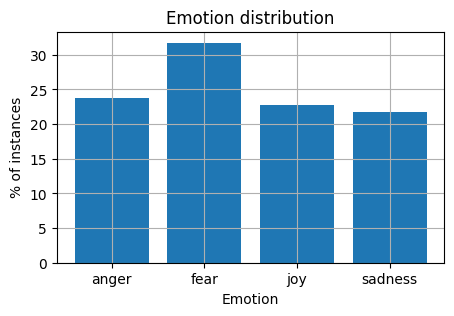

In [19]:
# the histogram of the data
labels = train_df['emotion'].unique()
post_total = len(train_df)
df1 = train_df.groupby(['emotion']).count()['text']
df1 = df1.apply(lambda x: round(x*100/post_total,3))

#plot
fig, ax = plt.subplots(figsize=(5,3))
plt.bar(df1.index,df1.values)

#arrange
plt.ylabel('% of instances')
plt.xlabel('Emotion')
plt.title('Emotion distribution')
plt.grid(True)
plt.show()
# 各類別資料量並無太大差異

## 2. Feature engineering
### Using Bag of Words
Using scikit-learn ```CountVectorizer``` perform word frequency and use these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [20]:
from sklearn.feature_extraction.text import CountVectorizer

In [21]:
# build analyzers (bag-of-words)
BOW_vectorizer = CountVectorizer()

In [22]:
# 1. Learn a vocabulary dictionary of all tokens in the raw documents.
# 丟進分析器學習每個單詞並編號(建立架構)
BOW_vectorizer.fit(train_df['text'])
# 2. Transform documents to document-term matrix.
# 將學習到的單詞向量化(將單字向量化)
train_data_BOW_features = BOW_vectorizer.transform(train_df['text'])
test_data_BOW_features = BOW_vectorizer.transform(test_df['text'])

In [23]:
# check the result
train_data_BOW_features

<3613x10115 sparse matrix of type '<class 'numpy.int64'>'
	with 51467 stored elements in Compressed Sparse Row format>

In [24]:
# check the type
type(train_data_BOW_features)

scipy.sparse._csr.csr_matrix

In [25]:
# add .toarray() to show
train_data_BOW_features.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [26]:
# check the dimension
train_data_BOW_features.shape

(3613, 10115)

In [27]:
# observe some feature names
feature_names = BOW_vectorizer.get_feature_names_out()
feature_names[100:110]

array(['2k17', '2much', '2nd', '30', '300', '301', '30am', '30pm', '30s',
       '31'], dtype=object)

In [28]:
# Print the vocabulary learned
print("Vocabulary:", feature_names)
# Convert train data features to a dataframe to visualize
print("\nTrain data BOW features:")
print(pd.DataFrame(train_data_BOW_features.toarray(), columns=BOW_vectorizer.get_feature_names_out()))
# Convert test data features to a dataframe to visualize
print("\nTest data BOW features:")
print(pd.DataFrame(test_data_BOW_features.toarray(), columns=BOW_vectorizer.get_feature_names_out()))

Vocabulary: ['00' '000' '00pm' ... 'य_ब' 'सत' 'アニメ']

Train data BOW features:
      00  000  00pm  00tiffanyr  01  02  03  0303  034  04  ...  zoolander  \
0      0    0     0           0   0   0   0     0    0   0  ...          0   
1      0    0     0           0   0   0   0     0    0   0  ...          0   
2      0    0     0           0   0   0   0     0    0   0  ...          0   
3      0    0     0           0   0   0   0     0    0   0  ...          0   
4      0    0     0           0   0   0   0     0    0   0  ...          0   
...   ..  ...   ...         ...  ..  ..  ..   ...  ...  ..  ...        ...   
3608   0    0     0           0   0   0   0     0    0   0  ...          0   
3609   0    0     0           0   0   0   0     0    0   0  ...          0   
3610   0    0     0           0   0   0   0     0    0   0  ...          0   
3611   0    0     0           0   0   0   0     0    0   0  ...          0   
3612   0    0     0           0   0   0   0     0    0   0  ...

The embedding is done. We can technically feed this into our model. However, depending on the embedding technique you use and your model, your accuracy might not be as high, because:

* curse of dimensionality  (we have 10,115 dimension now)
* some important features are ignored (for example, some models using emoticons yeld better performance than counterparts)

In [29]:
"😂" in feature_names

False

Let's try using another tokenizer below.

In [32]:
import nltk
nltk.download('punkt')
# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize, token_pattern=None)
# apply analyzer to training data
BOW_500.fit(train_df['text'])
train_data_BOW_features_500 = BOW_500.transform(train_df['text'])
## check dimension
train_data_BOW_features_500.shape

(3613, 500)

In [33]:
train_data_BOW_features_500.toarray()

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 6, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [34]:
# observe some feature names
feature_names_500 = BOW_500.get_feature_names_out()
feature_names_500[100:110]

array(['change', 'cheer', 'cheerful', 'cheerfully', 'cheering', 'cheery',
       'come', 'comes', 'could', 'country'], dtype=object)

In [35]:
# Convert train data features to a dataframe to visualize
print("\nTrain data BOW features:")
print(pd.DataFrame(train_data_BOW_features_500.toarray(), columns=BOW_500.get_feature_names_out()))


Train data BOW features:
      !  #  $  %  &  '  'd  'll  'm  're  ...  year  years  yet  you  your  \
0     1  0  0  0  0  0   0    0   0    0  ...     0      0    0    0     0   
1     0  6  0  0  1  0   0    0   0    0  ...     0      0    0    0     0   
2     0  0  0  0  0  0   0    0   0    0  ...     0      0    0    2     0   
3     0  0  0  0  0  0   0    0   0    0  ...     0      0    0    0     0   
4     0  0  0  0  0  0   0    1   0    0  ...     0      0    0    0     0   
...  .. .. .. .. .. ..  ..  ...  ..  ...  ...   ...    ...  ...  ...   ...   
3608  0  0  0  0  0  0   0    0   0    0  ...     0      0    0    0     0   
3609  0  0  0  0  0  0   0    0   0    0  ...     0      0    0    0     0   
3610  0  0  0  0  0  0   0    0   0    0  ...     0      0    0    0     0   
3611  0  0  0  0  1  0   0    0   0    0  ...     0      0    0    0     0   
3612  1  0  0  0  0  0   0    0   0    0  ...     0      0    0    1     0   

      yourself  ’  “  ”  😂  
0       

In [36]:
"😂" in feature_names_500

True

---
## 3. Model
### 3.1 Decision Trees
Using scikit-learn ```DecisionTreeClassifier``` performs word frequency and uses these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

In [37]:
from sklearn.tree import DecisionTreeClassifier

# for a classificaiton problem, you need to provide both training & testing data
X_train_BOW_500 = BOW_500.transform(train_df['text'])
y_train_BOW_500 = train_df['emotion']
X_test_BOW_500 = BOW_500.transform(test_df['text'])
y_test_BOW_500 = test_df['emotion']
## take a look at data dimension is a good habit  :)
print('X_train.shape: ', X_train_BOW_500.shape)
print('y_train.shape: ', y_train_BOW_500.shape)
print('X_test.shape: ', X_test_BOW_500.shape)
print('y_test.shape: ', y_test_BOW_500.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [38]:
display(y_train_BOW_500)

3375    sadness
2155        joy
1103       fear
512       anger
678       anger
         ...   
309       anger
3333    sadness
173       anger
46        anger
1932       fear
Name: emotion, Length: 3613, dtype: object

In [40]:
## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=1)
## training!
DT_model = DT_model.fit(X_train_BOW_500, y_train_BOW_500)
## predict!
y_train_pred_BOW_500 = DT_model.predict(X_train_BOW_500)
y_test_pred_BOW_500 = DT_model.predict(X_test_BOW_500)
## so we get the pred result
print("BOW_500:",y_test_pred_BOW_500[:10])

BOW_500: ['fear' 'anger' 'joy' 'fear' 'sadness' 'fear' 'fear' 'anger' 'fear' 'fear']


---
## 4. Results Evaluation

Now we will check the results of our model's performance

In [41]:
## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train_BOW_500, y_pred=y_train_pred_BOW_500)
acc_test = accuracy_score(y_true=y_test_BOW_500, y_pred=y_test_pred_BOW_500)
print('BOG_training accuracy: {}'.format(round(acc_train, 3)))
print('BOG_testing accuracy: {}'.format(round(acc_test, 3)))

BOG_training accuracy: 0.986
BOG_testing accuracy: 0.68


In [42]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report
print("BOW500")
print(classification_report(y_true=y_test_BOW_500, y_pred=y_test_pred_BOW_500))

BOW500
              precision    recall  f1-score   support

       anger       0.66      0.68      0.67        84
        fear       0.66      0.69      0.67       110
         joy       0.72      0.71      0.71        79
     sadness       0.70      0.64      0.67        74

    accuracy                           0.68       347
   macro avg       0.68      0.68      0.68       347
weighted avg       0.68      0.68      0.68       347



In [43]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test_BOW_500, y_pred=y_test_pred_BOW_500)
print("BOW500")
print(cm)

BOW500
[[57 18  6  3]
 [16 76  9  9]
 [ 6  9 56  8]
 [ 7 13  7 47]]


In [44]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from:
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))

    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'True label',
           ylabel = 'Predicted label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

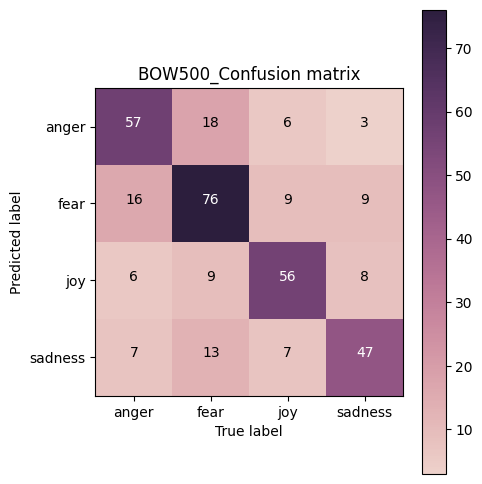

In [45]:
# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='BOW500_Confusion matrix')

---
### ** >>> Exercise 3 (Take home): **  
Can you interpret the results above? What do they mean?

#### Answer here
* 從混淆矩陣和classification_report中可以發現，無論是預測標籤為fear,但正確標籤為anger，甚至雙方顛倒過來，皆有大部分的誤判，可以發現說當模型在這兩個標籤的對立面上，誤判比例皆為前二。其次預測標籤為sadness,但正確標籤為fear的結果，還有預測標籤為fear,但正確標籤為joy的結果,這兩種組合的誤判率也是我們須注意的地方。另外，這個模型在處理'fear'標籤時具有更高的精準度，因為它有最深的顏色和最高的分數:76。


---
### ** >>> Exercise 4 (Take home): **  
Build a model using a ```Naive Bayes``` model and train it. What are the testing results?

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

In [47]:
#### Answer here
from sklearn.naive_bayes import BernoulliNB

## build model
NB_model = BernoulliNB(alpha = 1.0)
## training!
NB_model.fit(X_train_BOW_500, y_train_BOW_500)
## predict!
y_train_pred = NB_model.predict(X_train_BOW_500)
y_test_pred = NB_model.predict(X_test_BOW_500)
## so we get the pred result
print("Naive Bayes_Tfidf:",y_test_pred[:10])

Naive Bayes_Tfidf: ['joy' 'anger' 'joy' 'fear' 'anger' 'fear' 'fear' 'anger' 'fear' 'fear']


In [48]:
## accuracy and testing results
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train_BOW_500, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test_BOW_500, y_pred=y_test_pred)
print('Naive Bayes_training accuracy: {}'.format(round(acc_train, 3)))
print('Naive Bayes_testing accuracy: {}'.format(round(acc_test, 3)))

Naive Bayes_training accuracy: 0.794
Naive Bayes_testing accuracy: 0.7


In [49]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report
print(classification_report(y_true=y_test_BOW_500, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.61      0.68      0.64        84
        fear       0.74      0.76      0.75       110
         joy       0.81      0.68      0.74        79
     sadness       0.66      0.65      0.65        74

    accuracy                           0.70       347
   macro avg       0.70      0.69      0.70       347
weighted avg       0.71      0.70      0.70       347



[[57 13  5  9]
 [15 84  3  8]
 [10  7 54  8]
 [11 10  5 48]]


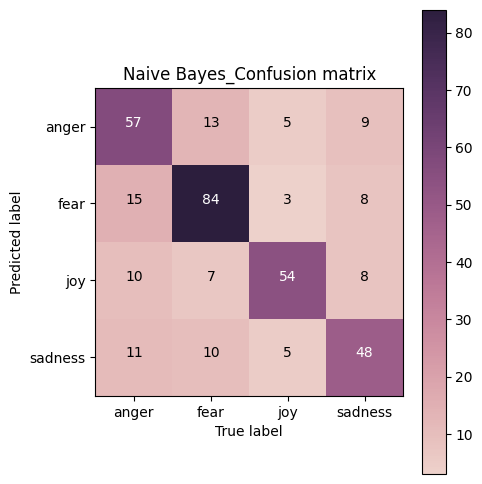

In [50]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test_BOW_500, y_pred=y_test_pred)
print(cm)
# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Naive Bayes_Confusion matrix')

---
### ** >>> Exercise 5 (Take home): **  

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

#### Answer here
* 首先從 classification_report 中可以發現，Decision Tree的分類器對於訓練資料的精準度有明顯優勢。相對測試資料而言，Naive Bayes的分類器在於測試資料的精準度較高於訓練資料。從兩種分類器從我們可以發現，Naive Bayes 基於貝氏定理，假定特徵之間是獨立的，對於高度相關的特徵可能表現不佳。因此在訓練時對於大規模和高維數據通常表現得很好。而Decision Tree用樹狀結構來進行分類，通過根據特徵的不同值來分割數據。每個分割點都是基於某個條件，使得在樹的每個節點上都有一個決策。因此在處理非獨立特徵時，可以在樹的不同分支上會多次使用相同的特徵。
* 在本次實驗，因為我們有限制只抓取前500個頻率相對較大的特徵，除了在維度部分有限制外，訓練資料不夠多的情形下，其在訓練的精準度上，Naive Bayes分數會低於決策樹的原因；相對決策樹因為善於處理非獨立特徵，可在樹的不同分支上使用相同特徵多次。但相對地決策樹遇到噪音非常敏感，在沒有數據清理的情況，雖然訓練資料的精準度上非常好，但在預測未知的測試資料，表現不甚理想，而Naive Bayes對於每個特徵之間是獨立的，在面對噪音或異常值得情境上相對優勢。
* 因此在選擇使用哪一種模型通常取決於數據的特點以及問題的性質。

## 5. Other things you can try

Thus, there are several things you can try that will affect your results. In order to yield better results, you can experiment by:
- Trying different features (Feature engineering)e.g Word2Vec, PCA, LDA, FastText, Clustering
- Trying different models
- Analyzing your results and interpret them to improve your feature engineering/model building process
- Iterate through the steps above until finding a satisfying result

Remember that you should also consider the task at hand and the model you'll feed the data to.

### Bonus: Compare fit -> transform and fit -> predict

In [51]:
# 1. Learn a vocabulary dictionary of all tokens in the raw documents.
BOW_vectorizer.fit(test_df['text'])

# 2. Transform documents to document-term matrix
train_data_BOW_features = BOW_vectorizer.transform(train_df['text'])
test_data_BOW_features = BOW_vectorizer.transform(test_df['text'])

In [52]:
# Training set and Testing set
X_train = train_data_BOW_features
y_train = train_df['emotion']

X_test = test_data_BOW_features
y_test = test_df['emotion']

## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=1)

## training!
DT_model = DT_model.fit(X_train, y_train)

## predict!
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

### Bonus: Randon Forest

training accuracy: 0.98
testing accuracy: 0.82
              precision    recall  f1-score   support

       anger       0.77      0.86      0.81        84
        fear       0.83      0.82      0.83       110
         joy       0.85      0.81      0.83        79
     sadness       0.84      0.80      0.82        74

    accuracy                           0.82       347
   macro avg       0.82      0.82      0.82       347
weighted avg       0.82      0.82      0.82       347



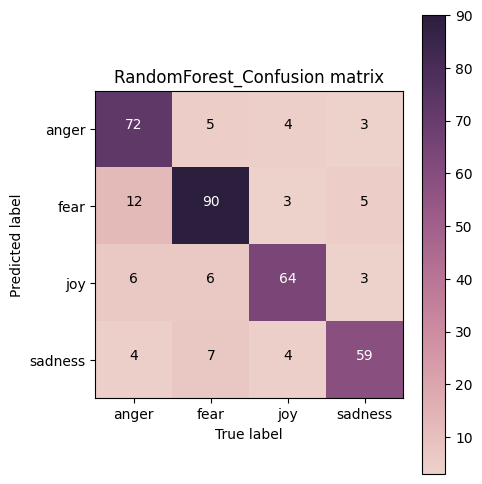

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

## build RandomForest model
RF_model = RandomForestClassifier(n_estimators=100, random_state=1) #100 trees in the forest

## training!
RF_model.fit(X_train, y_train)

## predict!
y_train_pred = RF_model.predict(X_train)
y_test_pred = RF_model.predict(X_test)

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))

print(classification_report(y_true=y_test, y_pred=y_test_pred))

## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred)
# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='RandomForest_Confusion matrix')

#### Randon Forest output the pdf of graph

In [57]:
# !pip install pydotplus
# GraphViz'Link: https://www.graphviz.org/
from sklearn.tree import export_graphviz
import pydotplus

### for instance, to visualize the first three trees from forest:
for idx, tree in enumerate(RF_model.estimators_[:3]):
    dot_data = export_graphviz(tree, out_file=None)
    graph = pydotplus.graph_from_dot_data(dot_data)
    graph.write_pdf(f"random-forest-tree{idx}.pdf")

---
## 6. Deep Learning

We use [Keras](https://keras.io/) to be our deep learning framwork, and follow the [Model (functional API)](https://keras.io/models/model/) to build a Deep Neural Network (DNN) model. Keras runs with Tensorflow in the backend. It's a nice abstraction to start working with NN models.

Because Deep Learning is a 1-semester course, we can't talk about each detail about it in the lab session. Here, we only provide a simple template about how to build & run a DL model successfully. You can follow this template to design your model.

We will begin by building a fully connected network, which looks like this:

<!-- ![Fully Connected Network](pics/pic1.png) -->
![Fully Connected Network](https://drive.google.com/uc?id=1xiET6RSGzgvV4ipD6k7oZy3HtvQpvno4)

(source: https://github.com/drewnoff/spark-notebook-ml-labs/tree/master/labs/DLFramework)

### 6.1 Prepare data (X, y)

In [58]:
import keras

# standardize name (X, y)
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## check dimension is a good habbit
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


### 6.2 Deal with categorical label (y)

Rather than put your label `train_df['emotion']` directly into a model, we have to process these categorical (or say nominal) label by ourselves.

Here, we use the basic method [one-hot encoding](https://en.wikipedia.org/wiki/One-hot) to transform our categorical  labels to numerical ones.

In [59]:
## deal with label (string -> one-hot)

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

check label:  ['anger' 'fear' 'joy' 'sadness']

## Before convert
y_train[0:4]:
 3375    sadness
2155        joy
1103       fear
512       anger
Name: emotion, dtype: object

y_train.shape:  (3613,)
y_test.shape:  (347,)


## After convert
y_train[0:4]:
 [[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]]

y_train.shape:  (3613, 4)
y_test.shape:  (347, 4)


### 6.3 Build model

In [60]:
# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  500
output_shape:  4


<!-- ![Imgur](pics/pic2.png) -->
![Imgur](https://drive.google.com/uc?id=1xh_tPrNq9v-7xys0qcBzFEmOZejD4i4a)

In [61]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)
# train_500 -> 64 -> 64 -> [4] -> [0.6,0.3,0.1,0]
model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 500)]             0         
                                                                 
 dense (Dense)               (None, 64)                32064     
                                                                 
 re_lu (ReLU)                (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 re_lu_1 (ReLU)              (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 4)                 260       
                                                                 
 softmax (Softmax)           (None, 4)                 0     

### 6.4 Train

In [62]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger(path + 'logs/training_log.csv')

# training setting
epochs = 25
batch_size = 32 # 總共3613筆資料, 並非全部丟進去訓練，而是分32筆進行批次處理，等於每回合要處理113筆資料才會更新一次參數

# training!
history = model.fit(X_train, y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')

Epoch 1/25


C:\Users\Tsuchida\.conda\envs\tensorflow\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning:

Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/model/dense/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/model/dense/embedding_lookup_sparse/Reshape:0", shape=(None, 64), dtype=float32), dense_shape=Tensor("gradient_tape/model/dense/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.



113/113 [==============================] - 3s 17ms/step - loss: 1.3158 - accuracy: 0.3814 - val_loss: 1.2504 - val_accuracy: 0.4467
Epoch 2/25
113/113 [==============================] - 1s 7ms/step - loss: 0.9380 - accuracy: 0.6626 - val_loss: 0.8882 - val_accuracy: 0.6888
Epoch 3/25
113/113 [==============================] - 1s 7ms/step - loss: 0.5550 - accuracy: 0.8007 - val_loss: 0.8031 - val_accuracy: 0.6916
Epoch 4/25
113/113 [==============================] - 1s 7ms/step - loss: 0.4086 - accuracy: 0.8458 - val_loss: 0.7863 - val_accuracy: 0.6974
Epoch 5/25
113/113 [==============================] - 1s 8ms/step - loss: 0.3211 - accuracy: 0.8832 - val_loss: 0.8180 - val_accuracy: 0.6686
Epoch 6/25
113/113 [==============================] - 1s 7ms/step - loss: 0.2572 - accuracy: 0.9128 - val_loss: 0.8823 - val_accuracy: 0.6772
Epoch 7/25
113/113 [==============================] - 1s 7ms/step - loss: 0.2150 - accuracy: 0.9267 - val_loss: 0.9057 - val_accuracy: 0.6744
Epoch 8/25
113/1

### 6.5 Predict on testing data

In [63]:
## predict
pred_result = model.predict(X_test, batch_size=128) # 共347筆, 共處理三回合
pred_result[:5]

3/3 [==============================] - 0s 4ms/step


array([[1.39465910e-05, 3.50540310e-01, 6.28572106e-01, 2.08735950e-02],
       [4.57837075e-01, 1.27665579e-01, 4.06889021e-01, 7.60833127e-03],
       [1.13803466e-07, 4.18326096e-07, 9.99990940e-01, 8.56241331e-06],
       [6.06758840e-06, 9.99665380e-01, 1.35787488e-07, 3.28365830e-04],
       [1.02477320e-01, 2.59393808e-02, 2.53281761e-02, 8.46255124e-01]],
      dtype=float32)

In [64]:
pred_result = label_decode(label_encoder, pred_result)
pred_result[:5]

array(['joy', 'anger', 'joy', 'fear', 'sadness'], dtype=object)

In [65]:
from sklearn.metrics import accuracy_score

print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test), pred_result), 2)))

testing accuracy: 0.67


In [66]:
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv(path + "logs/training_log.csv")
training_log

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.381400,1.315811,0.446686,1.250437
1,1,0.662607,0.938034,0.688761,0.888168
2,2,0.800720,0.555005,0.691643,0.803103
3,3,0.845834,0.408598,0.697406,0.786339
4,4,0.883200,0.321124,0.668588,0.817974
5,5,0.912815,0.257180,0.677233,0.882301
6,6,0.926654,0.215014,0.674352,0.905742
7,7,0.945198,0.177551,0.680115,1.011773
8,8,0.955439,0.155759,0.659942,1.028790
9,9,0.957653,0.137168,0.682997,1.126388


---
### ** >>> Exercise 6 (Take home): **  

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below.(Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?
<table><tr>
    <td><img src="https://drive.google.com/uc?id=1yyKQlYTdVmBTJw_9hYHzF1r6eFmmJEb2" style="width: 300px;"/> </td>
    <td><img src="https://drive.google.com/uc?id=1yqTIlNjs1VtIpKwWaDbV37g70FqggwnY" style="width: 300px;"/> </td>
</tr></table>

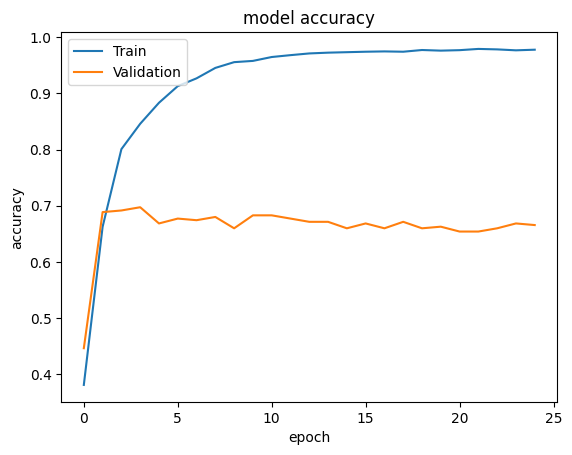

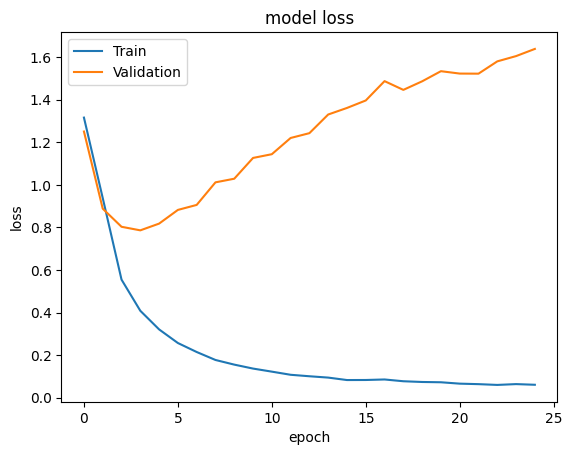

In [67]:
#### Answer here
import matplotlib.pyplot as plt
training_log
# summarize history for accuracy
plt.plot(training_log['accuracy'])
plt.plot(training_log['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(training_log['loss'])
plt.plot(training_log['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

* 我們從上圖模型的Loss學習曲線來解釋為何最終訓練發生的是 overfitting 。一個適合的模型的學習曲線在開始時雖會有較高的訓練或驗證的Loss，但隨著增加訓練範例逐漸降低並逐漸平坦，表明增加更多的訓練範例並不會改善模型在訓練數據上的性能，甚至不會改善模型對未見數據的性能。
* 但從圖表中，training loss 一直在不斷地下降，而validation loss 在訓練不到5回合的請況不再下降反而開始上升，代表 model 已經過度迎合 training data 或甚至把噪音和隨機波動也學進來了。
* 因此要降低overfitting有幾種方法
    1. 增加 regularization
    2. 收集更多 data
    3. 精簡 features
    4. 減低 model complexity

### Note

* 如果你沒有一個GPU（等級高於GTX 1060）或者你不擅長設定電腦的各種事物，我們建議你使用[kaggle kernel](https://www.kaggle.com/kernels)來進行深度學習模型的訓練。他們已經安裝了所有的庫並提供免費的GPU供您使用。
* 但是請注意，您只能運行一個kernel 6小時。在6小時無活動後，您的Kaggle kernel將會關閉（意味著如果你的模型需要超過6小時來訓練，你不能一次性完成它）。
### More Information for your reference
* Keras document: https://keras.io/
* Keras GitHub example: https://github.com/keras-team/keras/tree/master/examples
* CS229: Machine Learning: http://cs229.stanford.edu/syllabus.html
* Deep Learning cheatsheet: https://stanford.edu/~shervine/teaching/cs-229/cheatsheet-deep-learning
* If you want to try TensorFlow or PyTorch: https://pytorch.org/tutorials/
https://www.tensorflow.org/tutorials/quickstart/beginner

---
## 7. Word2Vector

We will introduce how to use `gensim` to train your word2vec model and how to load a pre-trained model.

https://radimrehurek.com/gensim/index.html

### 7.1 Prepare training corpus

In [22]:
## check library
import gensim

## ignore warnings
import warnings
warnings.filterwarnings('ignore')

# # if you want to see the training messages, you can use it
# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## the input type
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
train_df[['id', 'text', 'text_tokenized']].head()

,id,text,text_tokenized
2537,30533,Watch this amazing live.ly broadcast by @matt....,"[Watch, this, amazing, live.ly, broadcast, by,..."
1943,21086,My mind always seems to work its best at night,"[My, mind, always, seems, to, work, its, best,..."
2155,30151,#ContentwiththeLordsPortion:O satisfy us early...,"[#, ContentwiththeLordsPortion, :, O, satisfy,..."
3438,40611,Has anyone noticed that @npr stories in recent...,"[Has, anyone, noticed, that, @, npr, stories, ..."
2787,30783,@faithstrust @TheeCurrentYear imagine being th...,"[@, faithstrust, @, TheeCurrentYear, imagine, ..."


In [23]:
## create the training corpus
training_corpus = train_df['text_tokenized'].values
training_corpus[:3]

array([list(['Watch', 'this', 'amazing', 'live.ly', 'broadcast', 'by', '@', 'matt.boss', '#', 'musicallyjh']),
       list(['My', 'mind', 'always', 'seems', 'to', 'work', 'its', 'best', 'at', 'night']),
       list(['#', 'ContentwiththeLordsPortion', ':', 'O', 'satisfy', 'us', 'early', 'with', 'thy', '#', 'mercy', ';', 'that', 'we', 'may', '#', 'rejoice', '&', 'amp', ';', 'be', 'glad', 'all', 'our', 'days.', '#', 'Ps', '90:14', '#', 'gladness', '#', 'joy'])],
      dtype=object)

### 7.2 Training our model

You can try to train your own model. More details: https://radimrehurek.com/gensim/models/word2vec.html

In [24]:
from gensim.models import Word2Vec

## setting
vector_dim = 100
window_size = 5 # sliding window
min_count = 1
training_epochs = 20

## model
word2vec_model = Word2Vec(sentences=training_corpus,
                          vector_size=vector_dim, window=window_size,
                          min_count=min_count, epochs=training_epochs)

### 7.3 Generating word vector (embeddings)

In [25]:
# get the corresponding vector of a word
word_vec = word2vec_model.wv['happy'] # 將文字轉向量
display(word_vec.shape)
word_vec

(100,)

array([ 0.18723819,  0.09626177, -0.02904237,  0.20364784,  0.12896404,
       -1.2950101 ,  0.6717279 ,  1.3212498 , -0.63312   , -0.7809572 ,
       -0.59009856, -0.3059993 , -0.23561856,  0.4837991 , -0.07717734,
       -0.11093172,  0.30009535, -0.7719779 ,  0.48447844, -1.630931  ,
        0.8273186 ,  0.8223338 ,  0.64853597,  0.12366063,  0.02545575,
        0.04430988, -0.6240264 ,  1.0628684 , -0.43741006,  0.07974507,
        0.8626714 ,  0.2564391 ,  0.5015582 , -0.5411534 , -0.33453006,
        0.7138559 , -0.0375627 , -0.2239973 , -0.18548517, -0.25421175,
        0.2370412 , -0.08342534, -0.22057192,  0.57177967,  0.7689672 ,
       -0.18063359, -0.5721034 , -0.10704278,  0.20189324,  0.45540667,
        0.26875374,  0.1259258 ,  0.2308815 , -0.0915096 , -0.37801313,
       -0.26839557,  0.04781114, -0.07466151, -0.27348867, -0.61246693,
       -0.05228074,  0.05682725,  0.35191998,  0.09911203, -0.7487974 ,
        0.89173675,  0.4553454 ,  0.25673357, -1.4209992 ,  0.60

In [26]:
# 確定這個向量是否能代表該字且與該字相似的單字
# Get the most similar words
word = 'happy'
topn = 10
word2vec_model.wv.most_similar(word, topn=topn)

[('birthday', 0.9297583103179932),
 ('blessed', 0.9092535376548767),
 ('Be', 0.9082258343696594),
 ('help', 0.9041695594787598),
 ('PUSSY\\nP', 0.8981004953384399),
 ('smile', 0.8969538807868958),
 ('right', 0.8961185216903687),
 ('bday', 0.8921496868133545),
 ('keeping', 0.8920034170150757),
 ('memories😊', 0.8915759325027466)]

### 7.4 Using a pre-trained w2v model

Instead of training your own model ,you can use a model that has already been trained. Here, we see 2 ways of doing that:


#### (1) Download model by yourself

source: [GoogleNews-vectors-negative300](https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/view?resourcekey=0-wjGZdNAUop6WykTtMip30g)

more details: https://radimrehurek.com/gensim/models/keyedvectors.html

In [27]:
from gensim.models import KeyedVectors

## Note: this model is very huge, this will take some time ...
model_path = path + "GoogleNews/GoogleNews-vectors-negative300.bin.gz"
#解壓縮取的模型
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

w2v_google_model.most_similar('happy', topn=10)

load ok


[('glad', 0.7408890724182129),
 ('pleased', 0.6632170677185059),
 ('ecstatic', 0.6626912355422974),
 ('overjoyed', 0.6599286794662476),
 ('thrilled', 0.6514049172401428),
 ('satisfied', 0.6437949538230896),
 ('proud', 0.636042058467865),
 ('delighted', 0.627237856388092),
 ('disappointed', 0.6269949674606323),
 ('excited', 0.6247665286064148)]

#### (2) Using gensim api

Other pretrained models are available here: https://github.com/RaRe-Technologies/gensim-data

In [7]:
import gensim.downloader as api

# 使用其他模型 :glove-twitter-25
## If you see `SSL: CERTIFICATE_VERIFY_FAILED` error, use this:
import ssl
import urllib.request
ssl._create_default_https_context = ssl._create_unverified_context

glove_twitter_25_model = api.load("glove-twitter-25")
print('load ok')

glove_twitter_25_model.most_similar('happy', topn=10)

[==================================================] 100.0% 104.8/104.8MB downloaded
load ok


[('birthday', 0.9577818512916565),
 ('thank', 0.937666654586792),
 ('welcome', 0.93361496925354),
 ('love', 0.9176183342933655),
 ('miss', 0.9164500832557678),
 ('hello', 0.9158351421356201),
 ('thanks', 0.915008544921875),
 ('merry', 0.9053249359130859),
 ('bless', 0.902732253074646),
 ('wish', 0.9013164043426514)]

### 7.5 king + woman - man = ?
* Let's run one of the most famous examples for Word2Vec and compute the similarity between these 3 words:

In [8]:
w2v_google_model.most_similar(positive=['king', 'woman'], negative=['man'])

[('queen', 0.7118193507194519),
 ('monarch', 0.6189674139022827),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321839332581),
 ('kings', 0.5236844420433044),
 ('Queen_Consort', 0.5235945582389832),
 ('queens', 0.5181134343147278),
 ('sultan', 0.5098593831062317),
 ('monarchy', 0.5087411999702454)]

---
### ** >>> Exercise 7 (Take home): **  

Now, we have the word vectors, but our input data is a sequence of words (or say sentence).
How can we utilize these "word" vectors to represent the sentence data and train our model?
* [Migrating from Gensim 3.x to 4](https://github.com/piskvorky/gensim/wiki/Migrating-from-Gensim-3.x-to-4)
* [Doc2VEC]( https://radimrehurek.com/gensim/auto_examples/tutorials/run_doc2vec_lee.html)
* [reference](https://spotintelligence.com/2023/09/06/doc2vec/)

In [20]:
####Answer
# 將單詞向量相加以創建一個代表句子的新向量
import numpy as np

sentence = "we have the word vectors"
words_vec = np.array([])
words = nltk.word_tokenize(sentence)
print(words)

for w in words:
    wv = w2v_google_model[w]
    # 拓展维度 expand_dims
    wv = np.expand_dims(wv, axis=1)
    if len(words_vec) == 0:
        words_vec = wv
    else:
        words_vec = np.concatenate((words_vec, wv), axis=1)
        
print(words_vec.shape)
sent_v = words_vec.sum(axis=1)
print(sent_v.shape)
sent_v

['we', 'have', 'the', 'word', 'vectors']
(300, 5)
(300,)


array([ 0.5230713 ,  0.26220703,  0.34423828,  0.69311523, -0.8947754 ,
       -0.26257324, -0.1177063 , -0.34033203,  0.17822266,  0.4824829 ,
       -0.07836914, -0.91796875, -0.19671631,  0.06832886, -0.4883423 ,
        0.21514893,  0.04925537,  0.16101074, -0.23510742, -0.4491577 ,
       -0.371521  ,  0.4588623 ,  0.48526   , -0.24106598,  0.19213867,
        0.2902832 , -0.3602295 , -0.04199219,  0.25105286, -0.02891922,
       -0.30288696,  0.09558105,  0.01831055, -0.02163696,  0.12390137,
        0.48272705,  0.10934448, -0.16015625,  0.4794922 ,  0.04943848,
        0.28479004,  0.25952148,  0.33820343,  0.38134766,  0.03912354,
       -0.11094666,  0.16955566, -0.10766602,  0.21557617,  0.46276855,
       -0.06835938,  0.05670166, -0.5039673 , -0.19921875,  0.00830078,
        0.2685547 , -0.18847656, -0.67529297,  0.36517334, -0.04125977,
       -0.00512695,  0.45178223, -0.25097656, -0.02453613,  0.00219727,
       -0.3154297 ,  0.09924316,  0.93359375, -0.7883606 ,  0.59

### 8. Clustering: k-means

Here we introduce how to use `sklearn` to do the basic **unsupervised learning** approach, k-means.    

more details: http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

#### Basic concept

![Image](https://i.imgur.com/PEdUf54.png)

(img source: https://towardsdatascience.com/k-means-clustering-identifying-f-r-i-e-n-d-s-in-the-world-of-strangers-695537505d)

In [28]:
# clustering target
target_list = ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']
print('target words: ', target_list)

# convert to word vector
X = [word2vec_model.wv[word] for word in target_list]
print(X[0])

target words:  ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']
[ 0.18723819  0.09626177 -0.02904237  0.20364784  0.12896404 -1.2950101
  0.6717279   1.3212498  -0.63312    -0.7809572  -0.59009856 -0.3059993
 -0.23561856  0.4837991  -0.07717734 -0.11093172  0.30009535 -0.7719779
  0.48447844 -1.630931    0.8273186   0.8223338   0.64853597  0.12366063
  0.02545575  0.04430988 -0.6240264   1.0628684  -0.43741006  0.07974507
  0.8626714   0.2564391   0.5015582  -0.5411534  -0.33453006  0.7138559
 -0.0375627  -0.2239973  -0.18548517 -0.25421175  0.2370412  -0.08342534
 -0.22057192  0.57177967  0.7689672  -0.18063359 -0.5721034  -0.10704278
  0.20189324  0.45540667  0.26875374  0.1259258   0.2308815  -0.0915096
 -0.37801313 -0.26839557  0.04781114 -0.07466151 -0.27348867 -0.61246693
 -0.05228074  0.05682725  0.35191998  0.09911203 -0.7487974   0.89173675
  0.4553454   0.25673357 -1.4209992   0.6074068   0.01153325  0.3239548
  0.10168194 -0.32661307  0.752763   -0.43465683  0.581970

In [29]:
from sklearn.cluster import KMeans

# we have to decide how many cluster (k) we want
k = 2

# k-means model
kmeans_model = KMeans(n_clusters=k)
kmeans_model.fit(X)

# cluster result
cluster_result = kmeans_model.labels_
print(cluster_result )
# show
for i in range(len(target_list)):
    print('word: {} \t cluster: {}'.format(target_list[i], cluster_result[i]))

[1 1 1 0 0 0]
word: happy 	 cluster: 1
word: fear 	 cluster: 1
word: angry 	 cluster: 1
word: car 	 cluster: 0
word: teacher 	 cluster: 0
word: computer 	 cluster: 0


<!-- ![Imgur](pics/pic6.png) -->
![Imgur](https://drive.google.com/uc?id=1yf3LVoq-5PM66lm6GJVyckYvPJfw0-Wb)

In [30]:
#check cluster membership
word = 'student'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([0])

In [31]:
#check cluster membership
word = 'sad'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([1])

## 9. High-dimension Visualization: t-SNE
* 目標利用t-SNE來降維(與PCA相似)
* No matter if you use the Bag-of-words, TF-IDF, or Word2Vec, it's very hard to see the embedding result, because the dimension is larger than 3.  

* In Lab 1, we already talked about PCA. We can use PCA to reduce the dimension of our data, then visualize it. However, if you dig deeper into the result, you'd find it is insufficient.

* Our aim will be to create a visualization similar to the one below:

<!--#![Image](pics/pic7.png)-->
![Imgur](https://drive.google.com/uc?id=1yTtnM9ePzkUTeMwTeZ3DLIuD3OU_GB3o)
source: https://www.fabian-keller.de/research/high-dimensional-data-visualization

Here we would like to introduce another visualization method called t-SNE.  
http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

### 9.1 Prepare visualizing target

Let's prepare data lists like:
- happy words
- angry words
- data words
- mining words

In [32]:
word_list = ['happy', 'angry', 'data', 'mining']

topn = 5 #前五名 , 共24個單字
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]
data_words = ['data'] + [word_ for word_, sim_ in w2v_google_model.most_similar('data', topn=topn)]
mining_words = ['mining'] + [word_ for word_, sim_ in w2v_google_model.most_similar('mining', topn=topn)]

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('data_words: ', data_words)
print('mining_words: ', mining_words)

target_words = happy_words + angry_words + data_words + mining_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn #利用顏色可視化
print(color)

happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed']
data_words:  ['data', 'Data', 'datasets', 'dataset', 'databases', 'statistics']
mining_words:  ['mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'data', 'Data', 'datasets', 'dataset', 'databases', 'statistics', 'mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

color list:
['b', 'b', 'b', 'b', 'b', 'b', 'g', 'g', 'g', 'g', 'g', 'g', 'r', 'r', 'r', 'r', 'r', 'r', 'y', 'y', 'y', 'y', 'y', 'y']


### 9.2 Plot using t-SNE (2-dimension)

(224, 300)
(224, 2)


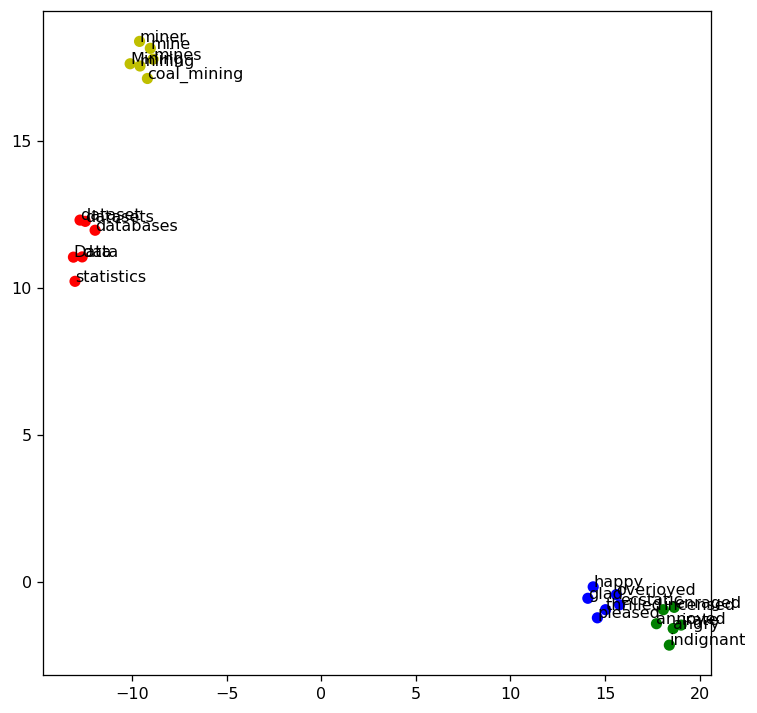

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words) #24
all_word = list(model.index_to_key) # google_model所有文字200
word_train = target_words + all_word[:size] # 24+200
X_train = model[word_train]
print(X_train.shape)

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28) #將維度降到2

## training
X_tsne = tsne.fit_transform(X_train)
print(X_tsne.shape)
## plot the result 顯示僅這24個單字
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

---
### ** >>> Exercise 8 (Take home): **  

Generate a t-SNE visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total).

In [34]:
# Answer here
word_list = ['angry', 'happy', 'sad', 'fear']

topn = 15 #前十五名 , 共60個單字
angry_words = [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]
happy_words = [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
sad_words = [word_ for word_, sim_ in w2v_google_model.most_similar('sad', topn=topn)]
fear_words = [word_ for word_, sim_ in w2v_google_model.most_similar('fear', topn=topn)]

print('angry_words: ', angry_words)
print('happy_words: ', happy_words)
print('sad_words: ', sad_words)
print('fear_words: ', fear_words)

target_words = happy_words + angry_words + sad_words + fear_words #60
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn #利用顏色可視化
print(color)

angry_words:  ['irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'exasperated', 'angrier', 'Angry']
happy_words:  ['glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirschbeck', 'elated', 'thankful', 'unhappy']
sad_words:  ['saddening', 'Sad', 'saddened', 'heartbreaking', 'disheartening', 'Meny_Friedman', 'parishioner_Pat_Patello', 'saddens_me', 'distressing', 'reminders_bobbing', 'Turkoman_Shiites', 'saddest', 'unfortunate', 'sorry', 'bittersweet']
fear_words:  ['fearful', 'fears', 'Fear', 'fearing', 'worry', 'dread', 'feared', 'anxiety', 'apprehension', 'afraid', 'worries', 'concern', 'distrust', 'worried', 'Fearful']

target words: 
['glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirschbeck', 'elated', 'thankful', 'unhappy', '

(60, 300)
(60, 2)


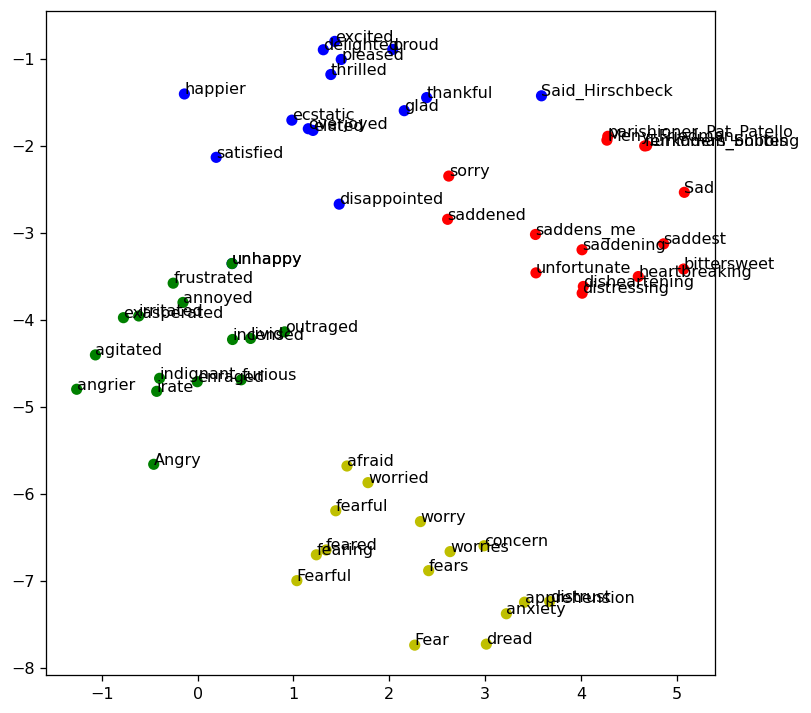

In [36]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
# size = 200
target_size = len(target_words) #60
# all_word = list(model.index_to_key) # google_model所有文字200
# word_train = target_words + all_word[:size] # 24+200
word_train = target_words
X_train = model[word_train]
print(X_train.shape)

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28) #將維度降到2

## training
X_tsne = tsne.fit_transform(X_train)
print(X_tsne.shape)
## plot the result 顯示僅這24個單字
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

# Kaggle Competition
* Third: This part is worth 30% of your grade. A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained.
## 1. Data Preprocessing
### 1.1 Import model

In [37]:
import pandas as pd
import json
from tqdm import tqdm
from pprint import pprint

import nltk

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

### raw tweet data

In [38]:
root ="../kaggle/"
tweets_DM = root + "tweets_DM.json"
emotion = root +"emotion.csv"
data_identification = root +"data_identification.csv"

In [42]:
# Import json file(tweets_DM.json)
tweets = []
for line in open(tweets_DM, 'r'):
    tweets.append(json.loads(line))

df_raw = pd.json_normalize(tweets)
df_raw.head()

,_score,_index,_crawldate,_type,_source.tweet.hashtags,_source.tweet.tweet_id,_source.tweet.text
0,391,hashtag_tweets,2015-05-23 11:42:47,tweets,[Snapchat],0x376b20,"People who post ""add me on #Snapchat"" must be ..."
1,433,hashtag_tweets,2016-01-28 04:52:09,tweets,"[freepress, TrumpLegacy, CNN]",0x2d5350,"@brianklaas As we see, Trump is dangerous to #..."
2,232,hashtag_tweets,2017-12-25 04:39:20,tweets,[bibleverse],0x28b412,"Confident of your obedience, I write to you, k..."
3,376,hashtag_tweets,2016-01-24 23:53:05,tweets,[],0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>
4,989,hashtag_tweets,2016-01-08 17:18:59,tweets,[],0x2de201,"""Trust is not the same as faith. A friend is s..."


In [43]:
# 擷取文章和ID
df_raw = df_raw.rename({'_source.tweet.tweet_id': 'tweet_id', '_source.tweet.text': 'text'}, axis='columns')
df_raw = df_raw[["_score", "text", "tweet_id"]]
df_raw

,_score,text,tweet_id
0,391,"People who post ""add me on #Snapchat"" must be ...",0x376b20
1,433,"@brianklaas As we see, Trump is dangerous to #...",0x2d5350
2,232,"Confident of your obedience, I write to you, k...",0x28b412
3,376,Now ISSA is stalking Tasha 😂😂😂 <LH>,0x1cd5b0
4,989,"""Trust is not the same as faith. A friend is s...",0x2de201
...,...,...,...
1867530,827,When you buy the last 2 tickets remaining for ...,0x316b80
1867531,368,I swear all this hard work gone pay off one da...,0x29d0cb
1867532,498,@Parcel2Go no card left when I wasn't in so I ...,0x2a6a4f
1867533,840,"Ah, corporate life, where you can date <LH> us...",0x24faed


### sentiment label


In [41]:
# 載入emotion.csv
df_sentiment = pd.read_csv(emotion)
df_sentiment.head()

,tweet_id,emotion
0,0x3140b1,sadness
1,0x368b73,disgust
2,0x296183,anticipation
3,0x2bd6e1,joy
4,0x2ee1dd,anticipation


In [55]:
# 測試
emotion = df_sentiment[df_sentiment.tweet_id == "0x34be8c"].emotion.item()
emotion

'joy'

### train-test label

In [56]:
# 載入data_identification
df_identify = pd.read_csv(data_identification)
df_identify.head()

,tweet_id,identification
0,0x28cc61,test
1,0x29e452,train
2,0x2b3819,train
3,0x2db41f,test
4,0x2a2acc,train


In [57]:
# df_identify與 df_sentiment 左結合, 以 tweet_id 為獨立編號
df_merge = pd.merge(df_identify, df_sentiment, how="left", on='tweet_id')
df_merge.head()

,tweet_id,identification,emotion
0,0x28cc61,test,NaN
1,0x29e452,train,joy
2,0x2b3819,train,joy
3,0x2db41f,test,NaN
4,0x2a2acc,train,trust


In [58]:
# 在與文章表格做結合
df_all = pd.merge(df_raw, df_merge, how="left", on='tweet_id')
df_all.head()

,_score,text,tweet_id,identification,emotion
0,391,"People who post ""add me on #Snapchat"" must be ...",0x376b20,train,anticipation
1,433,"@brianklaas As we see, Trump is dangerous to #...",0x2d5350,train,sadness
2,232,"Confident of your obedience, I write to you, k...",0x28b412,test,NaN
3,376,Now ISSA is stalking Tasha 😂😂😂 <LH>,0x1cd5b0,train,fear
4,989,"""Trust is not the same as faith. A friend is s...",0x2de201,test,NaN


In [59]:
# 將標籤為訓練資料獨立出來
df_train = df_all[df_all["identification"] == "train"]
df_train.head()

,_score,text,tweet_id,identification,emotion
0,391,"People who post ""add me on #Snapchat"" must be ...",0x376b20,train,anticipation
1,433,"@brianklaas As we see, Trump is dangerous to #...",0x2d5350,train,sadness
3,376,Now ISSA is stalking Tasha 😂😂😂 <LH>,0x1cd5b0,train,fear
5,120,@RISKshow @TheKevinAllison Thx for the BEST TI...,0x1d755c,train,joy
6,1021,Still waiting on those supplies Liscus. <LH>,0x2c91a8,train,anticipation


In [61]:
# 將標籤為訓練資料獨立出來
df_test = df_all[df_all["identification"] == "test"].drop(["_score"], axis=1)
df_test.head()

,text,tweet_id,identification,emotion
2,"Confident of your obedience, I write to you, k...",0x28b412,test,NaN
4,"""Trust is not the same as faith. A friend is s...",0x2de201,test,NaN
9,When do you have enough ? When are you satisfi...,0x218443,test,NaN
30,"God woke you up, now chase the day #GodsPlan #...",0x2939d5,test,NaN
33,"In these tough times, who do YOU turn to as yo...",0x26289a,test,NaN


### Save data

In [62]:
## save to pickle file
df_all.to_pickle("all_df.pkl")
df_train.to_pickle("train_df.pkl") 
df_test.to_pickle("test_df.pkl")

### Load data

In [24]:
import pandas as pd

## load a pickle file
# df_all = pd.read_pickle("all_df.pkl")
df_train = pd.read_pickle("train_df.pkl")
df_test = pd.read_pickle("test_df.pkl")

## 2.Data exploration
* understand the distribution

In [63]:
# 訓練集與測試集統計
df_all.groupby(['identification']).count()["tweet_id"]

identification
test      411972
train    1455563
Name: tweet_id, dtype: int64

In [64]:
df = df_train

In [68]:
# label統計
df.groupby(['emotion']).count()["tweet_id"]

emotion
anger            39867
anticipation    248935
disgust         139101
fear             63999
joy             516017
sadness         193437
surprise         48729
trust           205478
Name: tweet_id, dtype: int64

In [67]:
# 比例化
labels = df['emotion'].unique()
post_total = len(df)
df1 = df.groupby(['emotion']).count()['tweet_id']
df1 = df1.apply(lambda x: round(x*100/post_total,3))
df1

emotion
anger            2.739
anticipation    17.102
disgust          9.557
fear             4.397
joy             35.451
sadness         13.289
surprise         3.348
trust           14.117
Name: tweet_id, dtype: float64

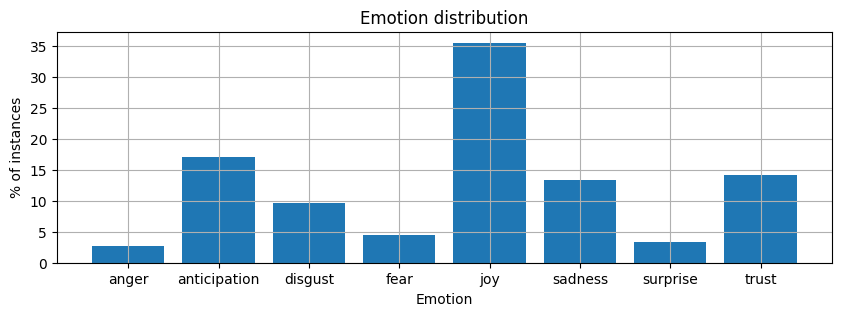

In [69]:
#show distribution in graph
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# the histogram of the data
labels = df['emotion'].unique()
post_total = len(df)
df1 = df.groupby(['emotion']).count()['tweet_id']
df1 = df1.apply(lambda x: round(x*100/post_total,3))

#plot
fig, ax = plt.subplots(figsize=(10,3))
plt.bar(df1.index,df1.values)

#arrange
plt.ylabel('% of instances')
plt.xlabel('Emotion')
plt.title('Emotion distribution')
plt.grid(True)
plt.show()

## 3.Feature engineering

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# df_raw.loc[:,"_score"].mean()
print("該分數平均:", df_train.loc[:,"_score"].mean())
# 僅取分數大於512的資料
df_train = df_train[df_train["_score"] > 512]
# 類別統計
df_train.groupby(['emotion']).count()["tweet_id"]
# 比例化
labels = df_train['emotion'].unique()
post_total = len(df_train)
df1 = df_train.groupby(['emotion']).count()['tweet_id']
df1 = df1.apply(lambda x: round(x*100/post_total,3))
df1

該分數平均: 512.3755536517485


emotion
anger            2.731
anticipation    17.060
disgust          9.556
fear             4.411
joy             35.509
sadness         13.235
surprise         3.351
trust           14.148
Name: tweet_id, dtype: float64

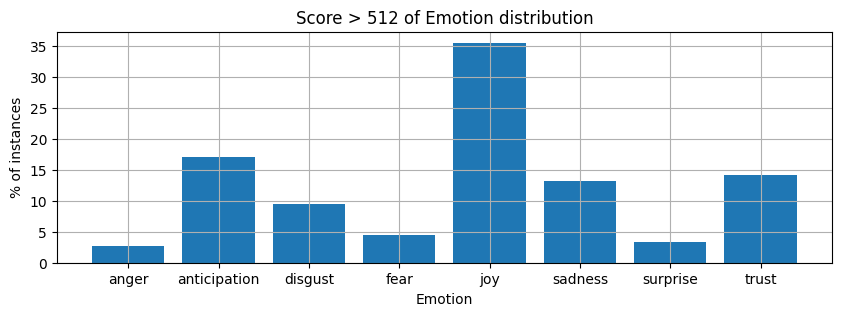

In [3]:
#show distribution in graph
%matplotlib inline

# the histogram of the data
labels = df_train['emotion'].unique()
post_total = len(df_train)
df1 = df_train.groupby(['emotion']).count()['tweet_id']
df1 = df1.apply(lambda x: round(x*100/post_total,3))

#plot
fig, ax = plt.subplots(figsize=(10,3))
plt.bar(df1.index,df1.values)

#arrange
plt.ylabel('% of instances')
plt.xlabel('Emotion')
plt.title('Score > 512 of Emotion distribution')
plt.grid(True)
plt.show()

### SentenceTransformer

In [2]:
# Setup modules 
# !pip install --quiet sentence-transformers
# !pip install lime --quiet
# !pip install --quiet seaborn

# Load modules 
from sentence_transformers import SentenceTransformer
from sklearn.model_selection import train_test_split

import gensim
import nltk
nltk.download('punkt') 

C:\Users\Tsuchidaken\anaconda3\envs\tensor_1221\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [26]:
# Modeling - Using a Sentence Transformer
model = SentenceTransformer('paraphrase-mpnet-base-v2')

In [7]:
# training 資料預處理
df_train_na = df_train.dropna().reset_index(drop=True)
train_id = df_train_na['tweet_id']

# Training embeddings
train_embeddings = model.encode(df_train_na['text'])
train_embeddings_dataframe = pd.DataFrame(train_embeddings)
train_embeddings_dataframe['tweet_id'] = train_id
train_embeddings_dataframe['emotion'] = df_train_na['emotion']
train_embeddings_dataframe

In [10]:
# training Dataset 輸出
train_embeddings_dataframe.to_pickle("embeddings_train_df.pkl")

In [27]:
# testing 資料預處理
df_test = df_test.reset_index(drop=True)
test_id = df_test['tweet_id']

# test embeddings
test_embeddings = model.encode(df_test['text'])
test_embeddings_dataframe = pd.DataFrame(test_embeddings)
test_embeddings_dataframe['tweet_id'] = test_id
test_embeddings_dataframe

,0,1,2,3,4,5,6,7,8,9,...,759,760,761,762,763,764,765,766,767,tweet_id
0,0.022685,0.092329,-0.005738,0.058587,0.072496,-0.043568,-0.161728,0.062479,0.142324,0.155198,...,0.005442,0.055207,0.123785,0.006869,-0.069393,-0.011549,0.077658,-0.082954,-0.111531,0x28b412
1,0.157975,0.097607,0.042909,0.142935,-0.066175,-0.048943,-0.019566,0.017619,0.296960,0.063106,...,0.017533,-0.090742,0.111285,-0.023540,0.238490,0.023788,0.049356,0.064402,0.038076,0x2de201
2,-0.048615,0.288452,0.149379,-0.038663,0.084482,-0.066496,-0.284200,0.065906,-0.000828,0.103797,...,-0.143857,-0.156438,0.151451,0.033344,-0.034106,-0.022977,0.090636,0.012425,-0.109962,0x218443
3,-0.074775,0.279185,-0.066582,-0.025440,-0.003644,-0.014643,0.199948,0.060919,0.112351,0.057102,...,0.063033,0.159637,0.034571,0.022197,0.034739,-0.063595,-0.050794,-0.143279,-0.065068,0x2939d5
4,0.018467,0.257763,0.030885,-0.085107,0.109644,-0.005322,0.046763,0.005586,0.291635,0.043000,...,-0.080490,0.069900,0.122277,-0.062018,-0.139353,-0.010073,0.045629,-0.013647,-0.070441,0x26289a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411967,0.120808,-0.133235,0.073419,0.027997,0.072607,0.013692,-0.250106,0.033591,-0.000973,0.031419,...,0.004757,0.048786,0.107976,-0.084272,-0.136682,0.015488,0.021368,-0.010942,-0.091318,0x2913b4
411968,0.098719,-0.018339,-0.115317,0.151983,0.109499,-0.053804,0.052738,0.175585,0.159266,0.087735,...,-0.006549,0.154968,0.053729,-0.095755,-0.059725,0.002030,0.140695,-0.034266,-0.014913,0x2a980e
411969,0.064327,0.152697,0.029311,0.140272,-0.106460,0.089240,0.056431,0.141138,0.089897,0.020344,...,0.031518,-0.147748,0.056868,-0.091354,-0.069582,-0.018699,-0.045930,0.047286,-0.153172,0x316b80
411970,-0.084189,0.251039,-0.015387,0.018006,0.094678,-0.000172,0.127296,0.167974,0.048930,0.135401,...,-0.021815,0.125306,0.226445,0.020862,0.038686,-0.000204,0.002970,-0.029433,-0.163473,0x29d0cb


In [28]:
# testing Dataset 輸出
# test_embeddings_dataframe.to_csv("D:\\test_embedding_1225.csv", index=False)
test_embeddings_dataframe.to_pickle("embeddings_test_df.pkl")

#### Load embeddings

In [1]:
import pandas as pd
import numpy as np

df_train = pd.read_pickle("embeddings_train_df.pkl")

In [2]:
X_train = df_train.drop(["tweet_id","emotion"], axis=1)
y_train = df_train["emotion"]

In [3]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
0,0.071505,0.082234,0.006219,0.179718,0.050084,0.015053,-0.045154,0.007039,0.107571,-0.020500,...,0.099861,0.073715,0.291002,0.154707,-0.028720,-0.237552,-0.017405,0.050074,-0.268313,-0.123757
1,-0.149611,-0.057241,-0.016519,0.207302,-0.007577,0.082262,0.104181,0.110682,-0.001886,-0.155466,...,0.195987,0.036947,0.043960,-0.133954,-0.030627,-0.043590,0.032295,0.295588,0.008567,-0.054312
2,-0.015062,0.094321,0.011047,-0.027385,-0.026644,0.047842,0.154043,-0.036735,0.221649,-0.097123,...,0.180617,0.083779,-0.092948,-0.043562,-0.009789,-0.122638,0.038186,0.079922,-0.024520,-0.043199
3,0.018235,-0.007158,0.011930,-0.038978,-0.005200,0.120120,-0.203243,-0.028562,0.231159,0.040486,...,0.020029,-0.014056,0.135839,0.017561,-0.019912,-0.174624,0.050747,0.133593,0.101685,-0.128139
4,0.053294,-0.001053,-0.033030,0.040617,0.048796,0.075704,0.108563,0.093851,0.049091,0.079122,...,0.077107,0.144386,-0.030578,-0.048551,0.021410,0.043118,0.167517,0.156225,-0.149218,-0.066900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727475,-0.136122,-0.007053,0.063562,0.063390,0.092964,-0.055489,-0.075488,-0.068356,0.089761,0.117443,...,0.083258,-0.039116,0.205411,0.042820,-0.040615,0.087163,0.115445,0.117018,-0.001733,-0.082757
727476,0.030776,0.073034,0.031466,-0.041477,0.134020,0.050078,0.127361,-0.025879,0.202094,0.060499,...,0.204478,0.125362,-0.026996,0.155876,0.077316,-0.000049,0.127443,0.043445,-0.035854,-0.018258
727477,-0.076485,0.076775,-0.051061,-0.034280,0.082154,-0.075866,-0.089871,-0.070091,-0.123885,0.031334,...,0.199984,-0.042322,0.042933,0.130142,-0.123966,-0.135091,-0.062703,-0.093124,-0.190357,-0.095173
727478,-0.028859,-0.073108,-0.021582,0.069924,0.066146,0.002339,-0.201103,-0.057229,0.148111,0.086186,...,0.095224,0.048773,0.134343,0.247403,-0.022225,0.074793,-0.039442,-0.107981,-0.030009,-0.152163


In [4]:
y_train

0         anticipation
1              sadness
2         anticipation
3                  joy
4                anger
              ...     
727475    anticipation
727476            fear
727477             joy
727478             joy
727479             joy
Name: emotion, Length: 727480, dtype: object

In [5]:
from sklearn.model_selection import train_test_split
# 訓練和驗證資料 
X_train, X_test, y_train_0, y_test_0 = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
# the name y_train_0 helps distinguish it from the form that is already processed (y_train)
# Also can better avoid data pollution where the data is accidentally encoded more than once

In [6]:
# 觀看資料
X_train[:3], y_train_0[:3]

(             0         1         2         3         4         5         6    \
 454546  0.005408  0.457806 -0.097943 -0.015187  0.120382  0.047242 -0.057516   
 511601 -0.070281 -0.077112  0.017932  0.090834 -0.055320  0.070480 -0.050340   
 707293 -0.087390  0.072044 -0.057890 -0.028285 -0.003782 -0.025984 -0.092211   
 
              7         8         9    ...       758       759       760  \
 454546  0.181719  0.001346 -0.105351  ... -0.039551  0.048221  0.047201   
 511601  0.066162  0.126147  0.111289  ... -0.078807 -0.062672  0.070593   
 707293 -0.005447  0.062591  0.207041  ...  0.022572  0.014452  0.114537   
 
              761       762       763       764       765       766       767  
 454546  0.013563  0.024418 -0.328221 -0.087986 -0.023862  0.010977  0.010861  
 511601 -0.031983 -0.020042  0.039305  0.002352  0.185396 -0.045230  0.032552  
 707293  0.046353  0.000316 -0.106452 -0.005397 -0.049235 -0.179569 -0.070973  
 
 [3 rows x 768 columns],
 454546           tru

## 4.Training
### Prepare data

In [7]:
import keras
# 檢查維度以確保一切正常運作
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train_0.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test_0.shape)

X_train.shape:  (581984, 768)
y_train.shape:  (581984,)
X_test.shape:  (145496, 768)
y_test.shape:  (145496,)


In [8]:
# 處理標籤 (字串 -> one-hot)
from sklearn.preprocessing import LabelEncoder
import tensorflow #new line
# from keras.utils import np_utils
import numpy as np

label_encoder = LabelEncoder()
label_encoder.fit(y_train_0) 
print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train_0[0:4]:\n', y_train_0[0:4])
print('\ny_train_0.shape: ', y_train_0.shape)
print('y_test_0.shape: ', y_test_0.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1) 
    return le.inverse_transform(dec)
    
# 讓編碼後的數據與未編碽的數據有不同的名稱，以避免問題
y_train = label_encode(label_encoder, y_train_0) 
y_test = label_encode(label_encoder, y_test_0)


check label:  ['anger' 'anticipation' 'disgust' 'fear' 'joy' 'sadness' 'surprise'
 'trust']

## Before convert
y_train_0[0:4]:
 454546           trust
511601             joy
707293    anticipation
459204             joy
Name: emotion, dtype: object

y_train_0.shape:  (581984,)
y_test_0.shape:  (145496,)


In [9]:
# 結果檢查
print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)



## After convert
y_train[0:4]:
 [[0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]]

y_train.shape:  (581984, 8)
y_test.shape:  (145496, 8)


### Build Model

In [10]:
# I/O 檢查
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  768
output_shape:  8


In [11]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax
from keras import optimizers
import tensorflow as tf

# 輸入層
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 第1個 hidden layer
X_W1 = Dense(units=512)(X)  # 256
H1 = ReLU()(X_W1)

# 第2個 hidden layer
H1_W2 = Dense(units=512)(H1)  # 512
H2 = ReLU()(H1_W2)

# 第三個 hidden layer
H2_W3 = Dense(units=512)(H2)  # 256
H3 = ReLU()(H2_W3)

# 輸出層
H3_W4 = Dense(units=output_shape)(H3)  # 4
H4 = Softmax()(H3_W4)

model_output = H4

# 建立模型
model = Model(inputs=[model_input], outputs=[model_output])
# 使用Adam最佳化
# 嘗試不同的學習速率以找出最佳的一種(0.01, 0.001, 0.05, 0.005, 0.1)
opt = tf.keras.optimizers.Adam(lr=0.001) #0.001

# loss function & optimizer  
# evaluate the model
model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 顯示模型建構
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 768)]             0         
                                                                 
 dense (Dense)               (None, 512)               393728    
                                                                 
 re_lu (ReLU)                (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 re_lu_1 (ReLU)              (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 re_lu_2 (ReLU)              (None, 512)               0     

C:\Users\Tsuchidaken\anaconda3\envs\tensor_1221\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [12]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('training_log_sentence.csv') 

# training setting
epochs = 5
batch_size = 32

# training!
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger], #在每一輪後將訓練結果儲存於csv檔案中
                    validation_data = (X_test, y_test))
print('training finish')

Epoch 1/5
18187/18187 [==============================] - 53s 3ms/step - loss: 1.2557 - accuracy: 0.5429 - val_loss: 1.2026 - val_accuracy: 0.5613
Epoch 2/5
18187/18187 [==============================] - 43s 2ms/step - loss: 1.1741 - accuracy: 0.5736 - val_loss: 1.1857 - val_accuracy: 0.5713
Epoch 3/5
18187/18187 [==============================] - 42s 2ms/step - loss: 1.1356 - accuracy: 0.5876 - val_loss: 1.1783 - val_accuracy: 0.5739
Epoch 4/5
18187/18187 [==============================] - 45s 2ms/step - loss: 1.1049 - accuracy: 0.5984 - val_loss: 1.1732 - val_accuracy: 0.5773
Epoch 5/5
18187/18187 [==============================] - 46s 3ms/step - loss: 1.0776 - accuracy: 0.6090 - val_loss: 1.1837 - val_accuracy: 0.5744
training finish


In [13]:
training_log = pd.DataFrame()
training_log = pd.read_csv("training_log_sentence.csv")
training_log

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.542881,1.255744,0.561328,1.202615
1,1,0.573600,1.174086,0.571287,1.185667
2,2,0.587571,1.135619,0.573878,1.178336
3,3,0.598448,1.104898,0.577287,1.173190
4,4,0.608989,1.077616,0.574380,1.183736


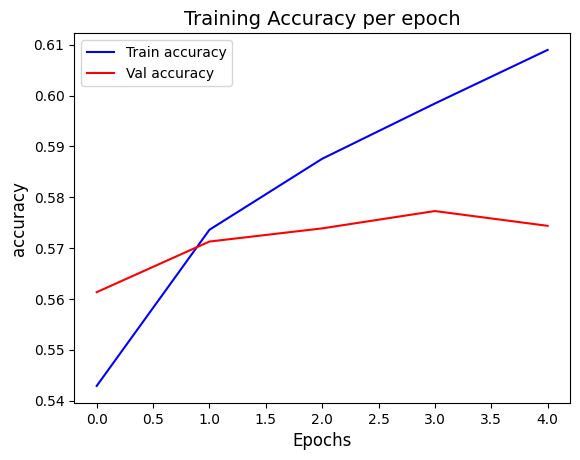

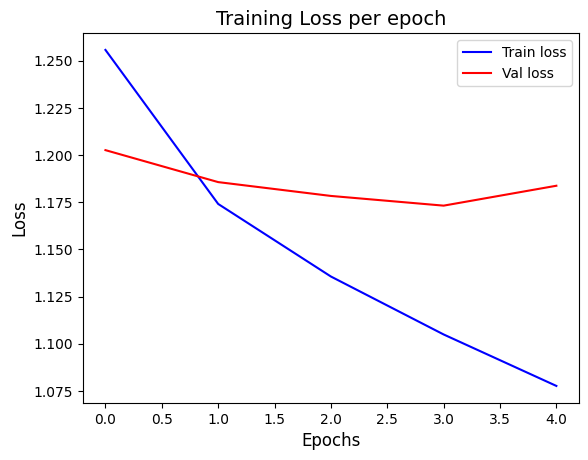

In [14]:
import matplotlib.pyplot as plt
# Check how the model is learning and know when to stop training to avoid overfitting
df = training_log

# Training Accuracy per epoch
plt.plot( df['accuracy'], color='blue', label ='Train accuracy')
plt.plot( df['val_accuracy'], color='red', label ='Val accuracy')
plt.title('Training Accuracy per epoch', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('accuracy', fontsize=12)
plt.legend()
plt.show()

# Training Loss per epoch
plt.plot( df['loss'], color='blue', label ='Train loss')
plt.plot( df['val_loss'], color='red', label ='Val loss')
plt.title('Training Loss per epoch', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend()
plt.show()

### Evaluation¶


In [15]:
## predict
pred_result = model.predict(X_test, batch_size=128)

1137/1137 [==============================] - 1s 1ms/step


In [16]:
from sklearn.metrics import accuracy_score
pred_result = label_decode(label_encoder, pred_result)
print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test), pred_result), 2)))

testing accuracy: 0.57


### Save Model

In [17]:
model.save('my_model.keras')

### Prediction


In [17]:
import tensorflow as tf
new_model = tf.keras.models.load_model('my_model.keras')

In [18]:
# 讀取 testing embedding
df_test = pd.read_pickle("embeddings_test_df.pkl")

In [19]:
df_test

,0,1,2,3,4,5,6,7,8,9,...,759,760,761,762,763,764,765,766,767,tweet_id
0,0.022685,0.092329,-0.005738,0.058587,0.072496,-0.043568,-0.161728,0.062479,0.142324,0.155198,...,0.005442,0.055207,0.123785,0.006869,-0.069393,-0.011549,0.077658,-0.082954,-0.111531,0x28b412
1,0.157975,0.097607,0.042909,0.142935,-0.066175,-0.048943,-0.019566,0.017619,0.296960,0.063106,...,0.017533,-0.090742,0.111285,-0.023540,0.238490,0.023788,0.049356,0.064402,0.038076,0x2de201
2,-0.048615,0.288452,0.149379,-0.038663,0.084482,-0.066496,-0.284200,0.065906,-0.000828,0.103797,...,-0.143857,-0.156438,0.151451,0.033344,-0.034106,-0.022977,0.090636,0.012425,-0.109962,0x218443
3,-0.074775,0.279185,-0.066582,-0.025440,-0.003644,-0.014643,0.199948,0.060919,0.112351,0.057102,...,0.063033,0.159637,0.034571,0.022197,0.034739,-0.063595,-0.050794,-0.143279,-0.065068,0x2939d5
4,0.018467,0.257763,0.030885,-0.085107,0.109644,-0.005322,0.046763,0.005586,0.291635,0.043000,...,-0.080490,0.069900,0.122277,-0.062018,-0.139353,-0.010073,0.045629,-0.013647,-0.070441,0x26289a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411967,0.120808,-0.133235,0.073419,0.027997,0.072607,0.013692,-0.250106,0.033591,-0.000973,0.031419,...,0.004757,0.048786,0.107976,-0.084272,-0.136682,0.015488,0.021368,-0.010942,-0.091318,0x2913b4
411968,0.098719,-0.018339,-0.115317,0.151983,0.109499,-0.053804,0.052738,0.175585,0.159266,0.087735,...,-0.006549,0.154968,0.053729,-0.095755,-0.059725,0.002030,0.140695,-0.034266,-0.014913,0x2a980e
411969,0.064327,0.152697,0.029311,0.140272,-0.106460,0.089240,0.056431,0.141138,0.089897,0.020344,...,0.031518,-0.147748,0.056868,-0.091354,-0.069582,-0.018699,-0.045930,0.047286,-0.153172,0x316b80
411970,-0.084189,0.251039,-0.015387,0.018006,0.094678,-0.000172,0.127296,0.167974,0.048930,0.135401,...,-0.021815,0.125306,0.226445,0.020862,0.038686,-0.000204,0.002970,-0.029433,-0.163473,0x29d0cb


In [20]:
test_feature = df_test.drop(["tweet_id"], axis=1)
test_feature

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
0,0.022685,0.092329,-0.005738,0.058587,0.072496,-0.043568,-0.161728,0.062479,0.142324,0.155198,...,0.048404,0.005442,0.055207,0.123785,0.006869,-0.069393,-0.011549,0.077658,-0.082954,-0.111531
1,0.157975,0.097607,0.042909,0.142935,-0.066175,-0.048943,-0.019566,0.017619,0.296960,0.063106,...,0.026435,0.017533,-0.090742,0.111285,-0.023540,0.238490,0.023788,0.049356,0.064402,0.038076
2,-0.048615,0.288452,0.149379,-0.038663,0.084482,-0.066496,-0.284200,0.065906,-0.000828,0.103797,...,0.108666,-0.143857,-0.156438,0.151451,0.033344,-0.034106,-0.022977,0.090636,0.012425,-0.109962
3,-0.074775,0.279185,-0.066582,-0.025440,-0.003644,-0.014643,0.199948,0.060919,0.112351,0.057102,...,0.114568,0.063033,0.159637,0.034571,0.022197,0.034739,-0.063595,-0.050794,-0.143279,-0.065068
4,0.018467,0.257763,0.030885,-0.085107,0.109644,-0.005322,0.046763,0.005586,0.291635,0.043000,...,0.025855,-0.080490,0.069900,0.122277,-0.062018,-0.139353,-0.010073,0.045629,-0.013647,-0.070441
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411967,0.120808,-0.133235,0.073419,0.027997,0.072607,0.013692,-0.250106,0.033591,-0.000973,0.031419,...,-0.064249,0.004757,0.048786,0.107976,-0.084272,-0.136682,0.015488,0.021368,-0.010942,-0.091318
411968,0.098719,-0.018339,-0.115317,0.151983,0.109499,-0.053804,0.052738,0.175585,0.159266,0.087735,...,-0.054311,-0.006549,0.154968,0.053729,-0.095755,-0.059725,0.002030,0.140695,-0.034266,-0.014913
411969,0.064327,0.152697,0.029311,0.140272,-0.106460,0.089240,0.056431,0.141138,0.089897,0.020344,...,0.058705,0.031518,-0.147748,0.056868,-0.091354,-0.069582,-0.018699,-0.045930,0.047286,-0.153172
411970,-0.084189,0.251039,-0.015387,0.018006,0.094678,-0.000172,0.127296,0.167974,0.048930,0.135401,...,0.057190,-0.021815,0.125306,0.226445,0.020862,0.038686,-0.000204,0.002970,-0.029433,-0.163473


In [21]:
# 預測 test_data
test_result = model.predict(test_feature, batch_size=128)
test_result = label_decode(label_encoder, test_result)

3219/3219 [==============================] - 4s 1ms/step


In [22]:
test_result[:3]

array(['anticipation', 'trust', 'joy'], dtype=object)

### Make submission df

In [23]:
df_test["emotion"] = test_result

In [24]:
df_test

,0,1,2,3,4,5,6,7,8,9,...,760,761,762,763,764,765,766,767,tweet_id,emotion
0,0.022685,0.092329,-0.005738,0.058587,0.072496,-0.043568,-0.161728,0.062479,0.142324,0.155198,...,0.055207,0.123785,0.006869,-0.069393,-0.011549,0.077658,-0.082954,-0.111531,0x28b412,anticipation
1,0.157975,0.097607,0.042909,0.142935,-0.066175,-0.048943,-0.019566,0.017619,0.296960,0.063106,...,-0.090742,0.111285,-0.023540,0.238490,0.023788,0.049356,0.064402,0.038076,0x2de201,trust
2,-0.048615,0.288452,0.149379,-0.038663,0.084482,-0.066496,-0.284200,0.065906,-0.000828,0.103797,...,-0.156438,0.151451,0.033344,-0.034106,-0.022977,0.090636,0.012425,-0.109962,0x218443,joy
3,-0.074775,0.279185,-0.066582,-0.025440,-0.003644,-0.014643,0.199948,0.060919,0.112351,0.057102,...,0.159637,0.034571,0.022197,0.034739,-0.063595,-0.050794,-0.143279,-0.065068,0x2939d5,anticipation
4,0.018467,0.257763,0.030885,-0.085107,0.109644,-0.005322,0.046763,0.005586,0.291635,0.043000,...,0.069900,0.122277,-0.062018,-0.139353,-0.010073,0.045629,-0.013647,-0.070441,0x26289a,trust
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411967,0.120808,-0.133235,0.073419,0.027997,0.072607,0.013692,-0.250106,0.033591,-0.000973,0.031419,...,0.048786,0.107976,-0.084272,-0.136682,0.015488,0.021368,-0.010942,-0.091318,0x2913b4,joy
411968,0.098719,-0.018339,-0.115317,0.151983,0.109499,-0.053804,0.052738,0.175585,0.159266,0.087735,...,0.154968,0.053729,-0.095755,-0.059725,0.002030,0.140695,-0.034266,-0.014913,0x2a980e,anticipation
411969,0.064327,0.152697,0.029311,0.140272,-0.106460,0.089240,0.056431,0.141138,0.089897,0.020344,...,-0.147748,0.056868,-0.091354,-0.069582,-0.018699,-0.045930,0.047286,-0.153172,0x316b80,sadness
411970,-0.084189,0.251039,-0.015387,0.018006,0.094678,-0.000172,0.127296,0.167974,0.048930,0.135401,...,0.125306,0.226445,0.020862,0.038686,-0.000204,0.002970,-0.029433,-0.163473,0x29d0cb,joy


In [25]:
df_result = df_test[["tweet_id", "emotion"]]

In [26]:
# collumn rename
df_result = df_result.rename({'tweet_id': 'id'}, axis='columns')

In [27]:
df_result.head()

,id,emotion
0,0x28b412,anticipation
1,0x2de201,trust
2,0x218443,joy
3,0x2939d5,anticipation
4,0x26289a,trust


In [28]:
# 提交數據
df_result.to_csv("submission_Sentence_NN_1227_3.csv", index=False)